In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
loan=pd.read_csv("credit_data.csv")
loan.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [38]:
loan.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [39]:
loan.count()

Age                         279856
Gender                      279856
Income                      279856
Credit Score                279856
Credit History Length       279856
Number of Existing Loans    279856
Loan Amount                 279856
Loan Tenure                 279856
Existing Customer           279856
State                       279856
City                        279856
LTV Ratio                   279856
Employment Profile          279856
Profile Score               279856
Occupation                  261584
dtype: int64

In [40]:
loan.isnull().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

In [41]:
loan['Occupation']=loan['Occupation'].fillna(method='ffill')

In [42]:
loan.isnull().sum()

Age                         0
Gender                      0
Income                      0
Credit Score                0
Credit History Length       0
Number of Existing Loans    0
Loan Amount                 0
Loan Tenure                 0
Existing Customer           0
State                       0
City                        0
LTV Ratio                   0
Employment Profile          0
Profile Score               0
Occupation                  0
dtype: int64

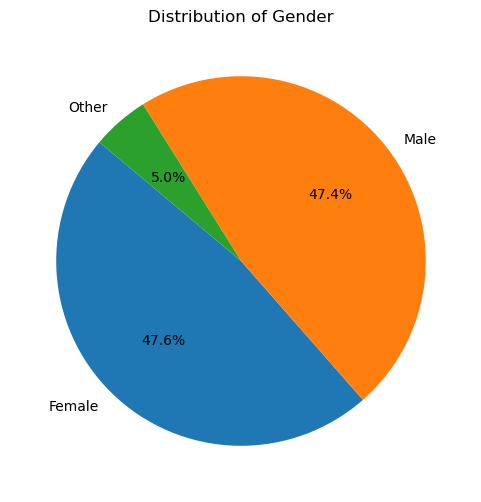

In [43]:
gender_counts=loan['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')

# Display the pie chart
plt.show()

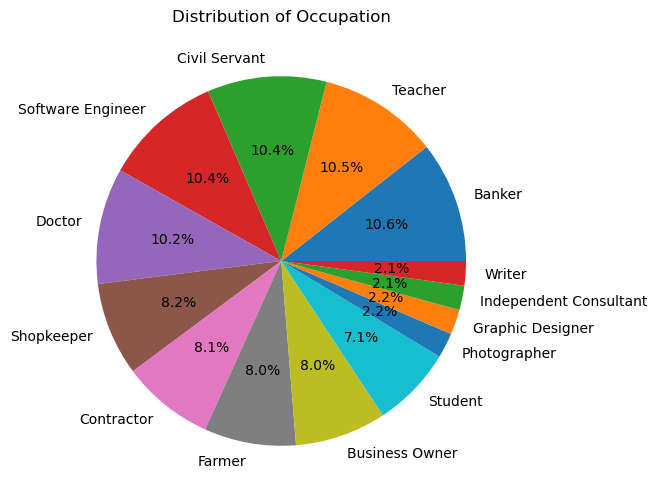

In [44]:
occupation_count=loan['Occupation'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(occupation_count, labels=occupation_count.index, autopct='%1.1f%%')
plt.title('Distribution of Occupation')
plt.show()

##Create histograms or box plots to visualize the distribution of variables like Age, Income, Credit Score, Credit History Length, Loan Amount, and Profile Score. 

ValueError: num must be 1 <= num <= 6, not 7

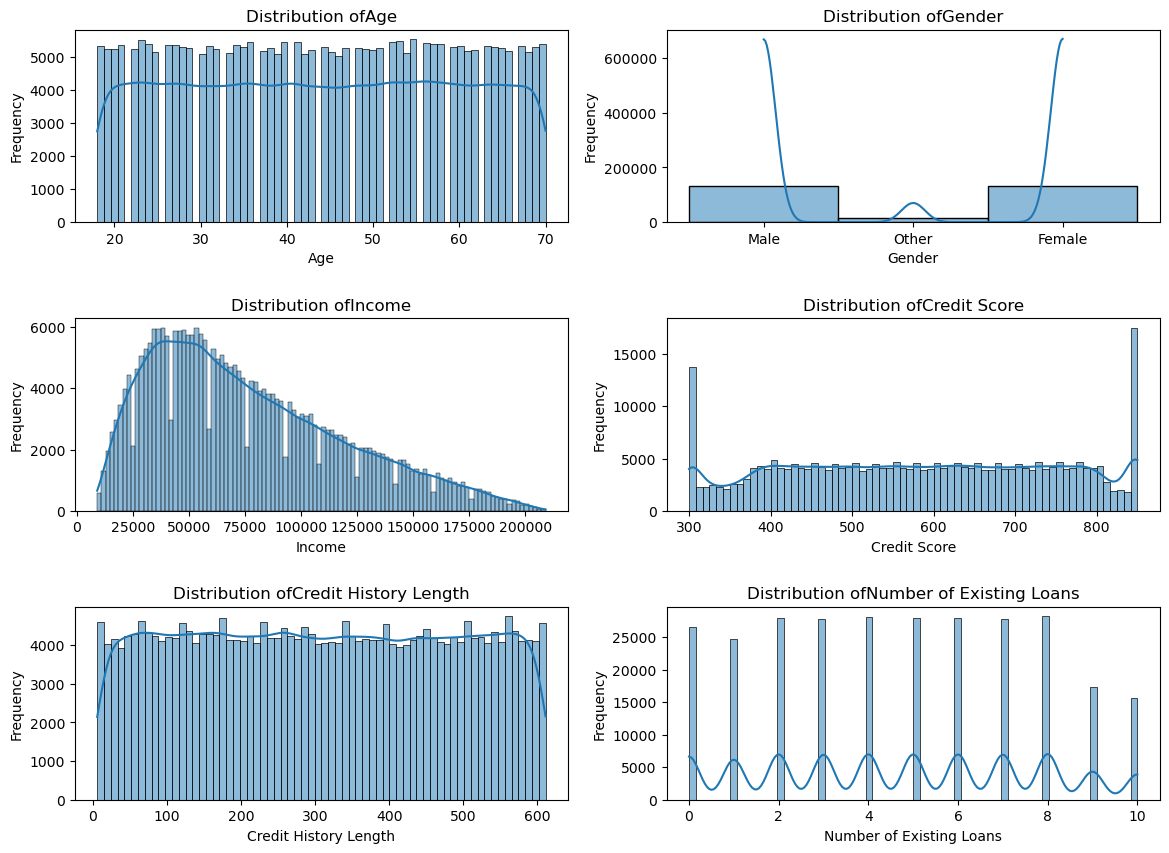

In [45]:
plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(loan.columns,1):
    plt.subplot(3,2,i)
    sns.histplot(loan[column],kde=True)
    plt.title(f'Distribution of{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.figure(figsize=(14,10))
plt.subplot_adjust(hspace=0.5)

for i, column in enumerate(loan.columns, 1):
    plt.subplot(3,2,i)
    sns.boxplot(y=loan[column])
    plt.title(f'Box Plot of{column}')
    plt.ylabel(column)
plt.show()
              
    
              

              

#Explore the relationships between variables by calculating correlation coefficients (e.g., Pearson's correlation) to determine if there are any significant associations.

Pearson's correlation coefficient between Income and Credit Score: 0.22024656218364178


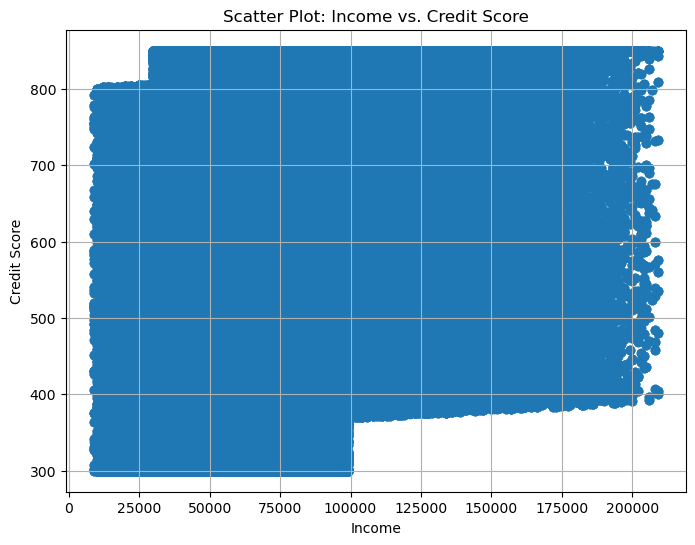

In [46]:
correlation_coefficient=loan['Income'].corr(loan['Credit Score'])
print(f"Pearson's correlation coefficient between Income and Credit Score: {correlation_coefficient}")
plt.figure(figsize=(8,6))
plt.scatter(loan['Income'], loan['Credit Score'])
plt.title('Scatter Plot: Income vs. Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

Pearson's correlation coefficient: 0.0019206133396361211


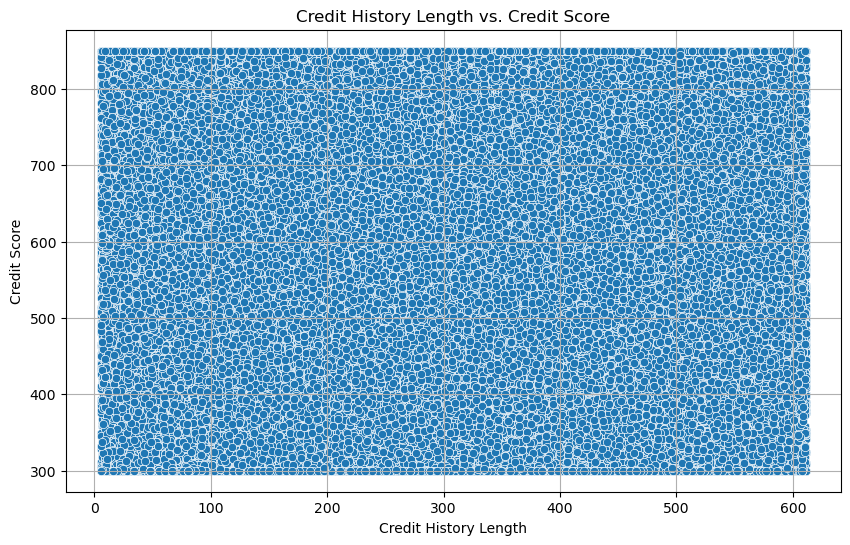

In [93]:
correlation_coefficient = loan['Credit History Length'].corr(loan['Credit Score'])
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
plt.figure(figsize=(10,6))
sns.scatterplot(data=loan, x='Credit History Length', y='Credit Score')
plt.title('Credit History Length vs. Credit Score')
plt.xlabel('Credit History Length')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

Pearson's correlation coefficient between Number of Existing Loan and Credit Score: 0.9945572396284031


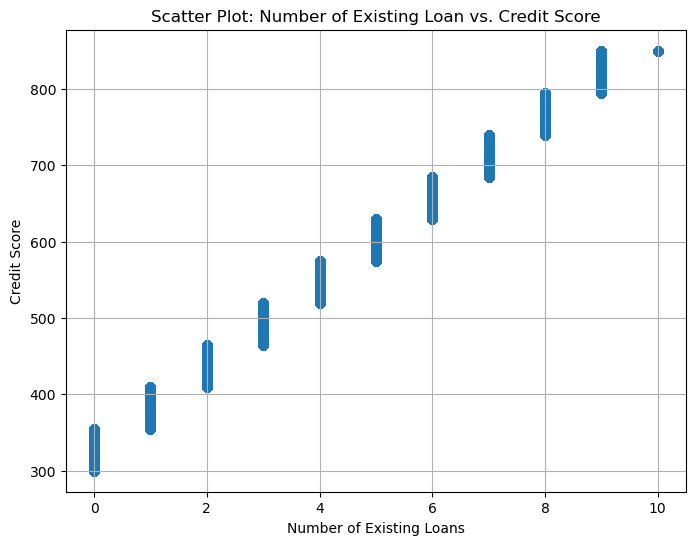

In [47]:
correlation_coefficient=loan['Number of Existing Loans'].corr(loan['Credit Score'])
print(f"Pearson's correlation coefficient between Number of Existing Loan and Credit Score: {correlation_coefficient}")
plt.figure(figsize=(8,6))
plt.scatter(loan['Number of Existing Loans'], loan['Credit Score'])
plt.title('Scatter Plot: Number of Existing Loan vs. Credit Score')
plt.xlabel('Number of Existing Loans')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

#converting the 'Employment Profile' column with values 'salaried', 'self employed', student, freelancer and unemployed into numerical values (1, 2, 3, 4 and 5),

In [77]:
employment_mapping = {'Salaried': 1, 'Self-Employed': 2, 'Freelancer': 3, 'Student': 4, 'Unemployed':5}
loan['Employmnet Profile Num']=loan['Employment Profile'].map(employment_mapping)
print(loan)

        Age  Gender  Income  Credit Score  Credit History Length  \
0        31    Male   36000           604                    487   
1        25    Male   50000           447                    386   
2        62   Other  178000           850                    503   
3        69  Female   46000           668                    349   
4        52    Male  132000           601                    553   
...     ...     ...     ...           ...                    ...   
279851   69    Male   61000           495                    565   
279852   45  Female  124000           850                    476   
279853   33  Female   71000           582                    560   
279854   67    Male  191000           411                    481   
279855   33   Other   18000           474                    374   

        Number of Existing Loans  Loan Amount  Loan Tenure Existing Customer  \
0                              5       109373          221                No   
1                      

Pearson's correlation coefficient between Employmnet Profile Num and Credit Score: -0.08609947798234992


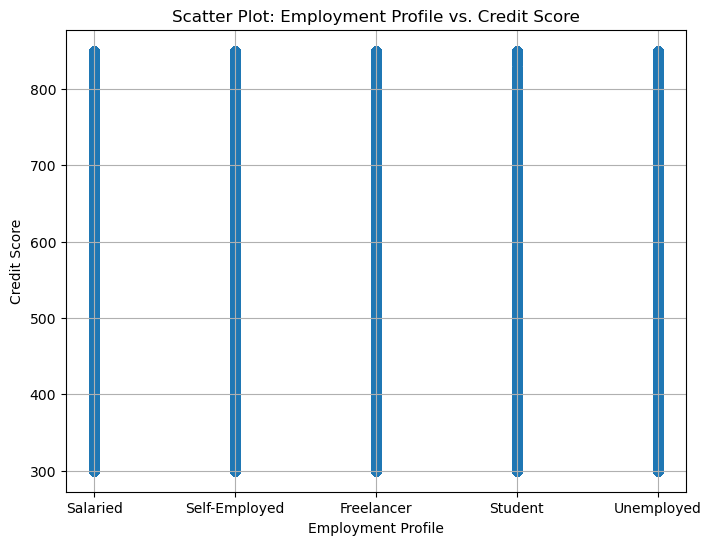

In [79]:
correlation_coefficient = loan['Employmnet Profile Num'].corr(loan['Credit Score'])
print(f"Pearson's correlation coefficient between Employmnet Profile Num and Credit Score: {correlation_coefficient}")
plt.figure(figsize=(8,6))
plt.scatter(loan['Employment Profile'], loan['Credit Score'])
plt.title('Scatter Plot: Employment Profile vs. Credit Score')
plt.xlabel('Employment Profile')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

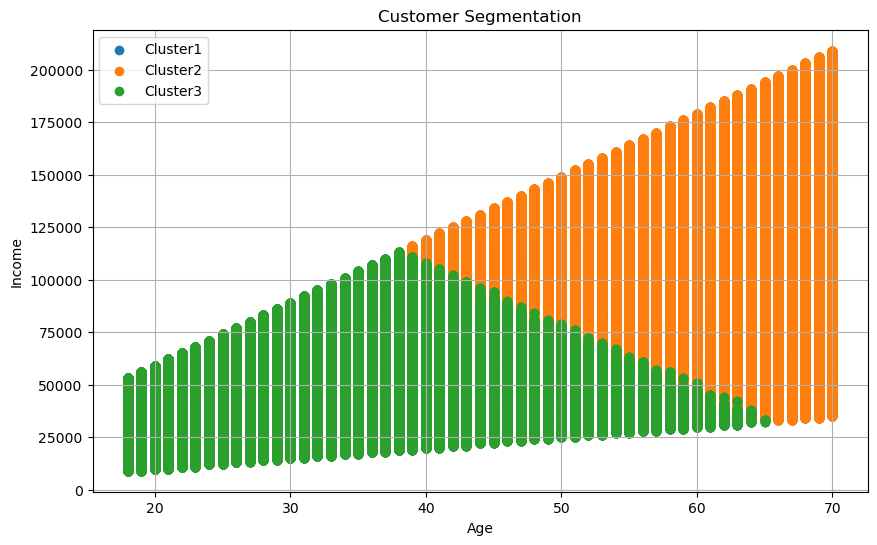

In [83]:
X = loan[['Age', 'Income', 'Credit Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
loan['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10,6))
for cluster in range(num_cluster):
    plt.scatter(loan[loan['Cluster'] == cluster]['Age'], loan[loan['Cluster']==cluster]['Income'], label=f'Cluster{cluster+1}')
plt.title("Customer Segmentation")
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True)

plt.show()

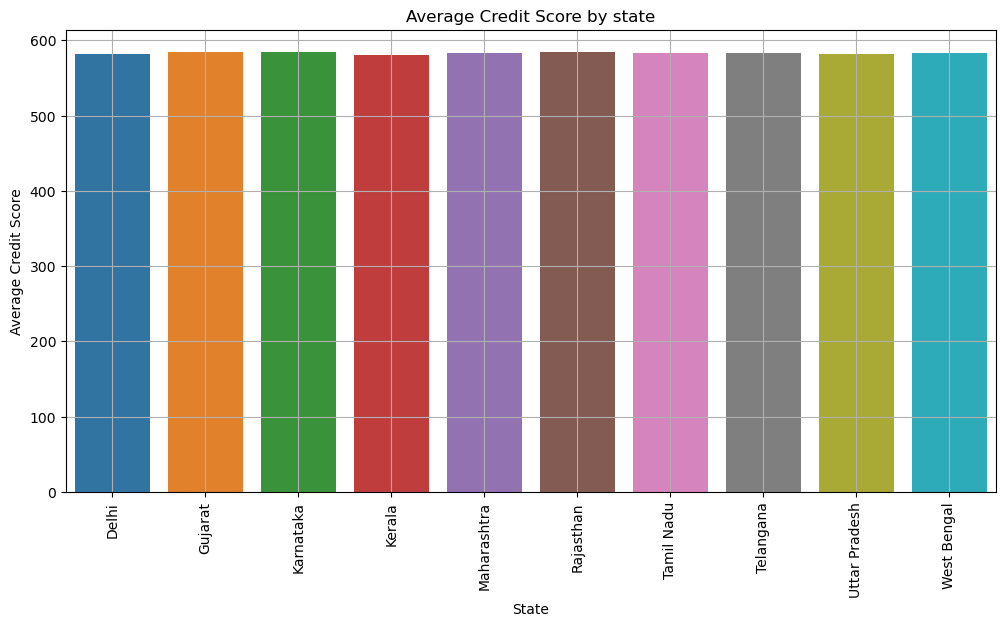

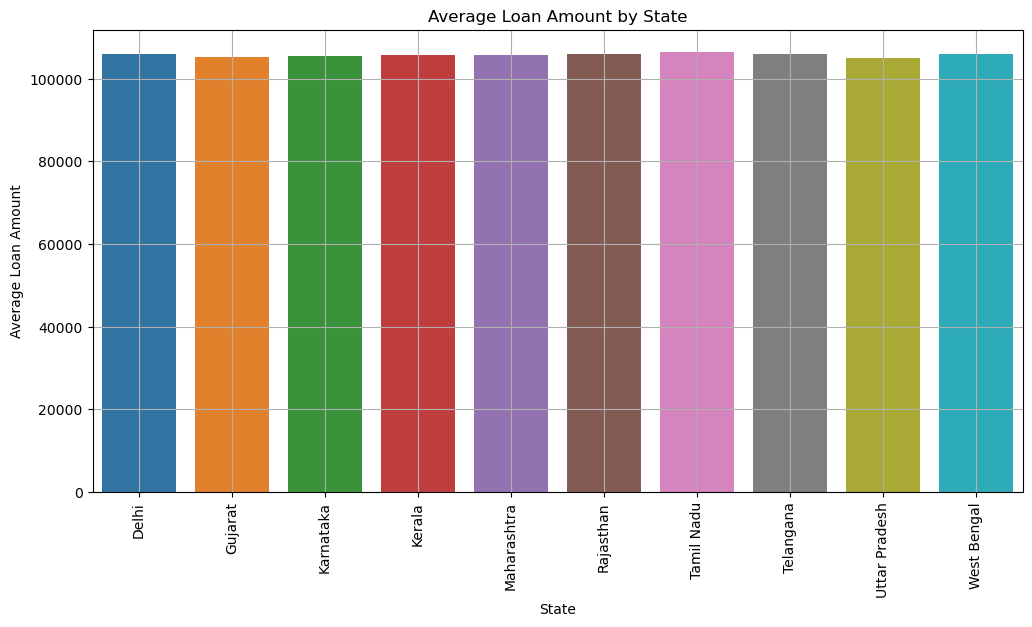

In [85]:
state_credit_score = loan.groupby('State')['Credit Score'].mean()
state_loan_amount = loan.groupby('State')['Loan Amount'].mean()
plt.figure(figsize=(12,6))
sns.barplot(x=state_credit_score.index, y=state_credit_score.values)
plt.title('Average Credit Score by state')
plt.xlabel('State')
plt.ylabel('Average Credit Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=state_loan_amount.index, y=state_loan_amount.values)
plt.title('Average Loan Amount by State')
plt.xlabel('State')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
    

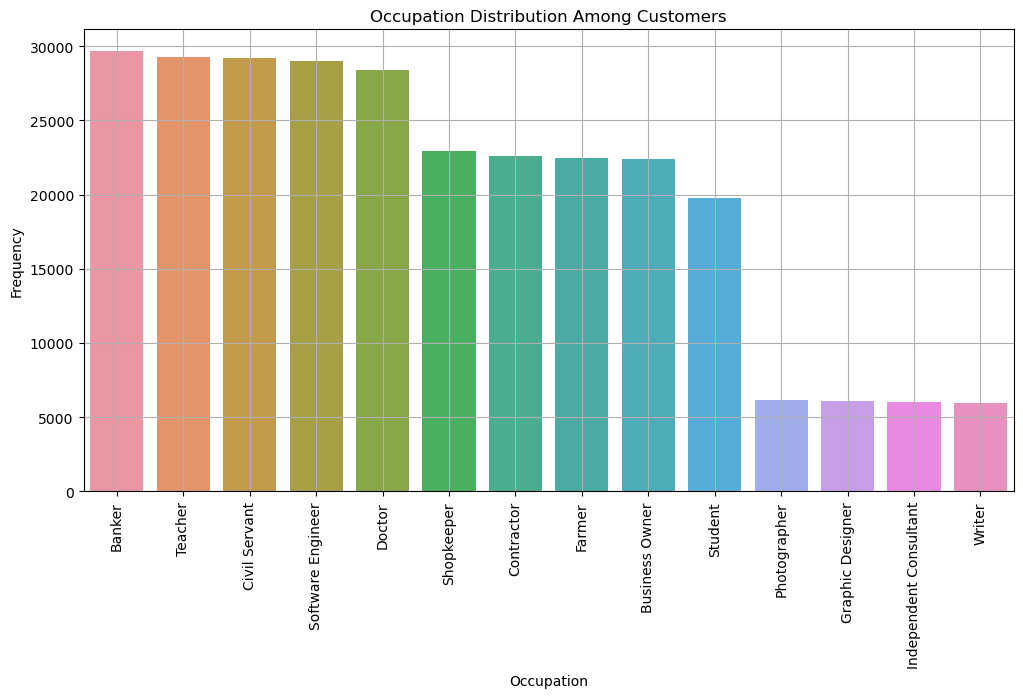

In [87]:
occupation_counts = loan['Occupation'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Occupation Distribution Among Customers')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()